# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [2]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    
    top = np.pi**(D / 2) * R ** D
    bot = sp.gamma(1 + D / 2)
    res = top / bot
    return res

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

In [3]:
first = getSphereVolumeExact(1)
second = getSphereVolumeExact(2)
third = getSphereVolumeExact(3)
print(first)
print(second)
print(third)

2.0
3.141592653589793
4.188790204786391


In [18]:
d = np.arange(1, 20)
v_d = []
for i in range(len(d)): 
    v_d.append(getSphereVolumeExact(d[i]))
v_d = np.array(v_d)

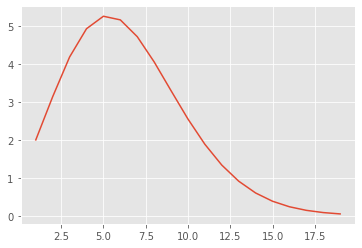

In [19]:
plt.plot(d, v_d)

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

Будем вычислять долю которую сфера занимает в положительном квандранте, а потом домножать на $2^D$. Ну и вычислять будем объем единичной сферы, а для произвольной просто по размерности  умножим на $R^D$

In [17]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    vec = np.random.rand(N, D)
    r = np.linalg.norm(vec, axis = 1)
    r = r <= 1
    s = sum(r)
    top = s * 2 ** D * R ** D
    return top / N

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

In [20]:
N = 10000

In [24]:
d = np.arange(1, 20)
v_d = []
for i in range(len(d)): 
    exact = getSphereVolumeExact(d[i])
    rand = getSphereVolumePseudorandom(N, d[i])
    v_d.append((exact - rand) / exact)
v_d = np.array(v_d)

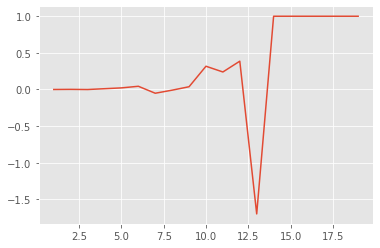

In [26]:
plt.plot(d, v_d)

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [31]:
#!pip install sobol_seq <-- uncomment to install sobol_seq
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [12]:
sobol_seq.i4_sobol_generate?

In [13]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    vec = sobol_seq.i4_sobol_generate(D, N)
    r = np.linalg.norm(vec, axis = 1)
    f = r <= 1
    s = sum(f)
    top = s * 2 ** D * R ** D
    return top / N

In [14]:
sobol_seq.i4_sobol_generate(2, 10)[0, :]

array([0.5, 0.5])

In [16]:
getSphereVolumeQuasirandom(10000, 2)

3.142

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

In [17]:
v_rand = []
for i in range(len(d)): 
    exact = getSphereVolumeExact(d[i])
    rand = getSphereVolumePseudorandom(N, d[i])
    v_rand.append((exact - rand) / exact)
    
v_sobol = []
for i in range(len(d)): 
    exact = getSphereVolumeExact(d[i])
    sobol = getSphereVolumeQuasirandom(N, d[i])
    v_sobol.append((exact - sobol) / exact)

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

<IPython.core.display.Javascript object>


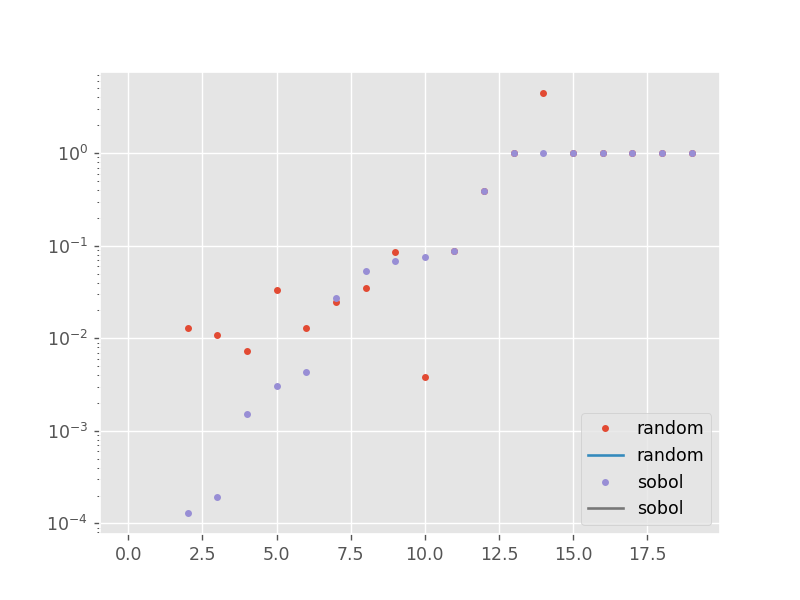

In [18]:
plt.plot(num, v_rand, '.', 'r', label = 'random')
plt.plot(num, v_sobol, '.', 'b', label = 'sobol')
plt.yscale('log')
plt.legend()

Точнее результат получается при работе с последовательностями Соболева.

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [69]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    arr = (np.random.randint(2, size = (N, N)) - 0.5) * 2

    return arr.astype(int)

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


очевидно, что новая энергия это просто минус старая  
Ну мне лень разбираться как там должно быть на границах, поэтому давайте у нас будут периодические граничные условия

In [70]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = len(state)
    old = -state[i, j] * (state[i, (j + 1) % N] + state[i, j - 1] + state[(i + 1) % N, j] + state[i - 1, j])
    return -2 * old

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [71]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = len(state)
    for i in range(N ** 2):
        rand = np.random.randint(N, size = 2)
        i = rand[0]
        j = rand[1]
        delt = getDeltaE(i, j, state)
        if delt < 0:
            state[i, j] = -state[i, j]
        else:
            probability = np.exp(-delt / T)
            rand = np.random.rand(1)
            if rand < probability:
                state[i, j] = -state[i, j]
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [72]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''

    shift = np.roll(state, -1, axis = 1) + np.roll(state, 1, axis = 1) + \
             + np.roll(state, -1, axis = 0) + np.roll(state, 1, axis = 0)
    s = np.sum(state * shift)
    s = -s
    return s

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [73]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    
    s = np.sum(state)
    
    return s

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [74]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

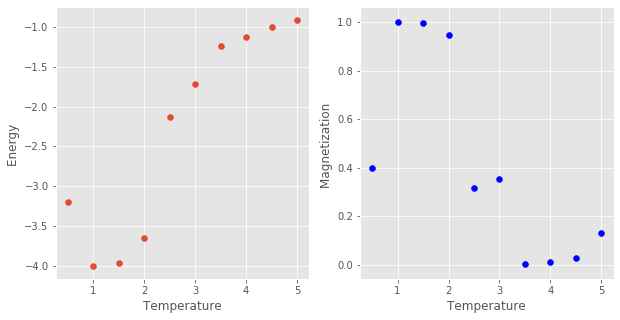

In [75]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        state = makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Видно что для графика E(T) заметен характерный рост, что физически обосновано при росте температуры. Касательно намагниченности можно сказать, что при увеличении температуры растет и энтропия которая в свою очередь описывает хаотичность системы, а именно хаотичное направление спинов, из за чего и происходит размагничивание тела, что как раз мы и видим на графике M(T)# ТУТ НАДО ЧТО ТО НАПИСАТЬ

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [85]:
N = 100
state = getInitialState(N)

In [86]:
def show(t, state):
    for i in range(150):        
        state = makeFlip(t, state)
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.imshow(state)

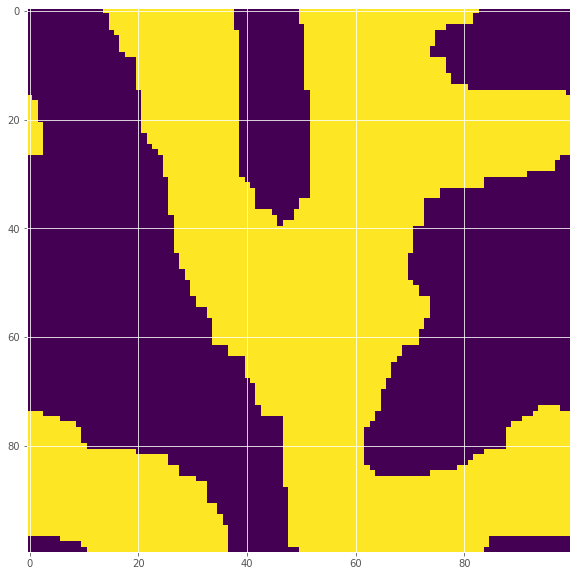

In [87]:
show(0.5, state)

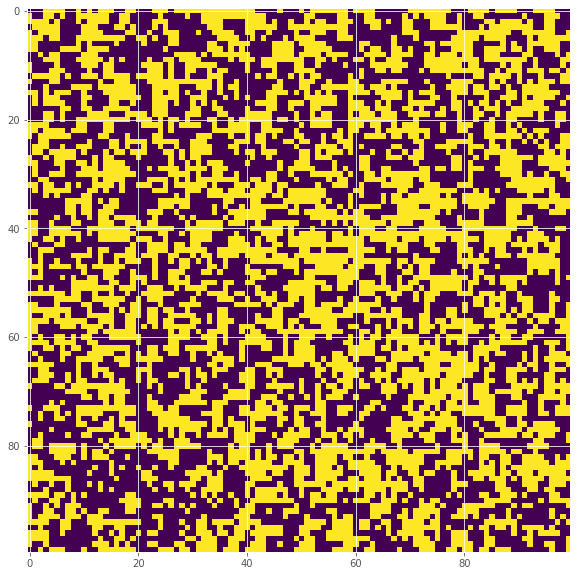

In [88]:
show(5, state)

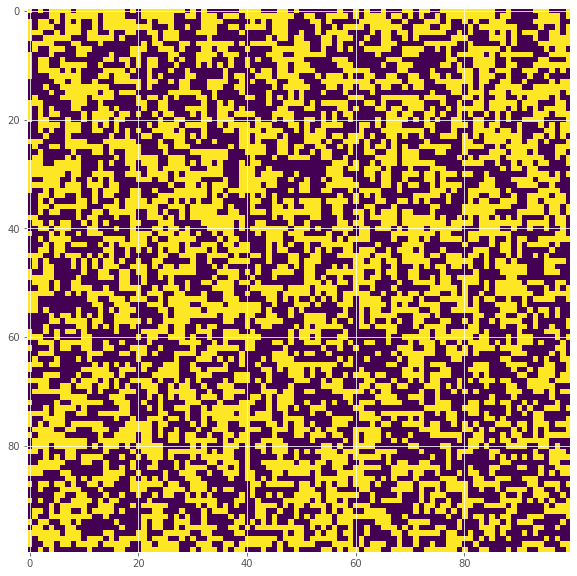

In [89]:
show(10, state)

Можем заметить что когда температура стремится к 0, спины расположены менее хаотично, т.е. наблюдаются целые области в которых спиы с одинаковым направлением. В то же время, когда температура повышается наблюдается размагничивание, тут уже участки с противоположными спиновыми моментами "Гасят" друг друга.